<h1> Analysis and Report</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel('Data.xlsx', sheet_name="Sales", header=1)
df1.head()

,Date,Channel,Customer,Category,Product,Sales PCS,Sales Amount,Profit Margin,Date/Text,Day
0,2020-01-15,Big Dealer,DISCOVERY,FAN,CFA00,50,36000,0.245860,15/01/2020,15
1,2020-01-13,Big Dealer,CLD,Emergency lights,EL009,100,88000,0.050950,13/01/2020,13
2,2020-01-13,Big Dealer,PHIL,FAN,CF087,50,204000,0.357727,13/01/2020,13
3,2020-01-13,Big Dealer,CLD,flashlight,TH258,20,50000,0.112817,13/01/2020,13
4,2020-01-13,Big Dealer,CLD,Camping lanterns,OL090,500,47000,0.177313,13/01/2020,13


In [3]:
df1.drop(['Date/Text', 'Day', 'Category'], axis=1, inplace=True)

In [4]:
df1.head()

,Date,Channel,Customer,Product,Sales PCS,Sales Amount,Profit Margin
0,2020-01-15,Big Dealer,DISCOVERY,CFA00,50,36000,0.245860
1,2020-01-13,Big Dealer,CLD,EL009,100,88000,0.050950
2,2020-01-13,Big Dealer,PHIL,CF087,50,204000,0.357727
3,2020-01-13,Big Dealer,CLD,TH258,20,50000,0.112817
4,2020-01-13,Big Dealer,CLD,OL090,500,47000,0.177313


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           200 non-null    datetime64[ns]
 1   Channel        200 non-null    object        
 2   Customer       200 non-null    object        
 3   Product        200 non-null    object        
 4   Sales PCS      200 non-null    int64         
 5   Sales Amount   200 non-null    int64         
 6   Profit Margin  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.1+ KB


In [6]:
df1.shape, df1.size

((200, 7), 1400)

In [7]:
df1.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,200,2020-01-16 14:31:12,2020-01-13 00:00:00,2020-01-13 00:00:00,2020-01-15 00:00:00,2020-01-18 00:00:00,2020-01-29 00:00:00,NaN
Sales PCS,200.0,329.63,2.0,4.0,10.0,100.0,6000.0,943.682647
Sales Amount,200.0,464747.9,-37050.0,49450.0,150600.0,561825.0,12814000.0,1052895.906387
Profit Margin,200.0,0.216126,-0.038205,0.098116,0.183055,0.333925,0.89352,0.156682


In [8]:
df1['Sales PCS'].unique()

array([  50,  100,   20,  500, 1500, 1000, 3600, 1350,  900,  750, 2000,
        480,  300, 3300,  600,  180,    2,    3, 1200, 3000,   15,    5,
          6,   10,  250,  150, 1300,   40,  240,  960, 6000,    4,  120,
        144,  200,   60,   72,  160,   32,   45,   36,   25, 4000,   16],
      dtype=int64)

In [9]:
(df1['Sales PCS'] == 6000).value_counts()

Sales PCS
False    197
True       3
Name: count, dtype: int64

In [10]:
(df1['Sales PCS'] == 3000).value_counts()

Sales PCS
False    199
True       1
Name: count, dtype: int64

In [11]:
df1['Sales PCS'].min()

2

In [12]:
df1['Channel'].value_counts()

Channel
Big Dealer      152
Supermarket      35
E-commercial     13
Name: count, dtype: int64

In [13]:
df1['Customer'].nunique()

30

In [14]:
df1.Customer.max()

'eshop'

<h2>Visalisation</h2>

In [15]:
pd.crosstab(df1.Date, df1.Channel)

Channel,Big Dealer,E-commercial,Supermarket
Date,,,
2020-01-13,61,0,6
2020-01-15,47,0,15
2020-01-18,5,9,14
2020-01-22,29,4,0
2020-01-29,10,0,0


In [16]:
df1.columns

Index(['Date', 'Channel', 'Customer', 'Product', 'Sales PCS', 'Sales Amount',
       'Profit Margin'],
      dtype='object')

In [17]:
df1.index = df1.Date
df1.drop(columns="Date", inplace=True)
df1.head()

,Channel,Customer,Product,Sales PCS,Sales Amount,Profit Margin
Date,,,,,,
2020-01-15,Big Dealer,DISCOVERY,CFA00,50,36000,0.245860
2020-01-13,Big Dealer,CLD,EL009,100,88000,0.050950
2020-01-13,Big Dealer,PHIL,CF087,50,204000,0.357727
2020-01-13,Big Dealer,CLD,TH258,20,50000,0.112817
2020-01-13,Big Dealer,CLD,OL090,500,47000,0.177313


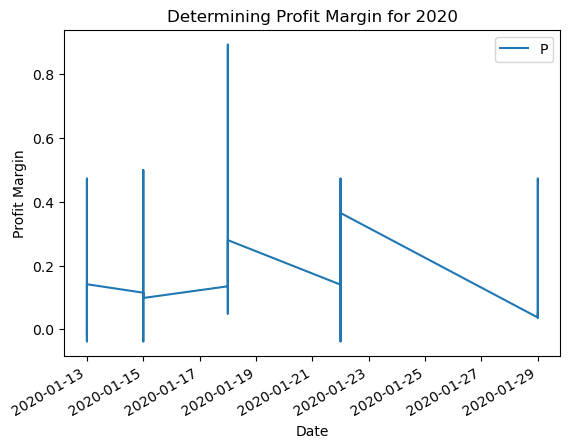

In [18]:
df1['Profit Margin'].plot()
plt.title("Determining Profit Margin for 2020")
plt.xlabel("Date")
plt.ylabel("Profit Margin")
plt.legend("Profit Margin")

Text(0, 0.5, 'Sales Amount')

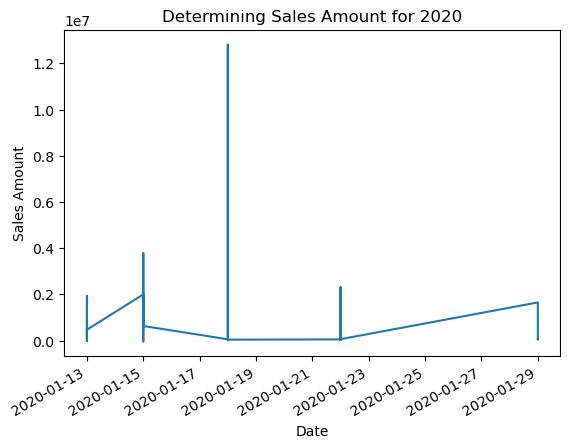

In [19]:
df1['Sales Amount'].plot()
plt.title("Determining Sales Amount for 2020")
plt.xlabel("Date")
plt.ylabel("Sales Amount")

<BarContainer object of 200 artists>

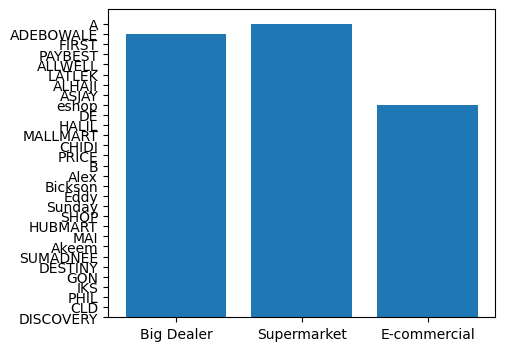

In [27]:
fig, ax = plt.subplots(figsize=[5,4])
ax.bar(df1.Channel, df1.Customer)
#fig.add_axes([0, 0,0, 1])

